In [1]:

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
print ('Dimension de x_train', x_train.shape)
print ('Dimension de y_train', y_train.shape)
print ('Dimension de x_test', x_test.shape)
print ('Dimension de x_test', x_test.shape)

Dimension de x_train (60000, 28, 28)
Dimension de y_train (60000,)
Dimension de x_test (10000, 28, 28)
Dimension de x_test (10000, 28, 28)


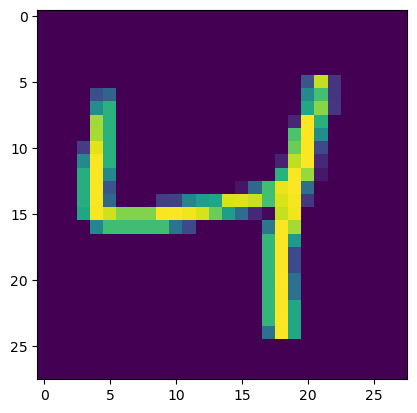

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [5]:
x_train[0].max() 

255

In [6]:
x_train=x_train/255
x_test=x_test/255
 
# the pixel values will be in the range of [0, 1] in order to make the
# model rapidly converge in the training step and to avoid the problems 
# related with different scale

In [7]:
x_train[0] # to present the 1st image of the training data of mnist 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
y_train[0] # that means that the first class is for the number 5 

5

In [9]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [11]:
#from keras.utils import np_utils
nb_classes = 10
y_train = to_categorical (y_train, nb_classes)
y_test = to_categorical (y_test, nb_classes)

In [12]:
#initialising the ANN
model=Sequential()
#Adding the input layer and the first hidden layer
# the first hidden layer will be with 784 neurons
model.add(Dense(512, input_shape=(784,))) # Unidimentional input with 784 neurons

#Relu: f(x) = max (0,x)
model.add(Activation('relu'))
model.add(Dropout(0.2))



# The sequential model is used in the case of simple classification
# or regression  (l'information circule de manière linéaire à travers le réseau
# passant par la 1ère  couche à la dernière sans retour en arrière)

C:\Users\MSI\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Adding the 2nd hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))


In [14]:
model.add(Dense(10))
model.add(Activation('softmax')) #multiclasses # 10= nb de classes 
model.add(Dropout(0.2))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# The optimizers are algorithms used to solve optimization problems by minimizing
# the loss function. And here we are using the 'adam' optimizer

In [17]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose= 1)
# verbose : this parameter controls the level of details displayed during training. 
# 1 : means detailed progress bars and logs will be shown
# 0 : means no display
# 2 : means a simplified display with less information (affichage simplifié)
# batch_size = 128 : represents the number of samples 

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6789 - loss: 3.6205
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7729 - loss: 3.2800
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7785 - loss: 3.3047
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7836 - loss: 3.2679
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7867 - loss: 3.2561
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7854 - loss: 3.2996
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7916 - loss: 3.2226
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7856 - loss: 3.3221
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7917 - loss: 3.2437
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7930 - loss: 3.2371


# Evaluate the model

In [18]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9752 - loss: 0.0920
Test accuracy: 0.9789999723434448


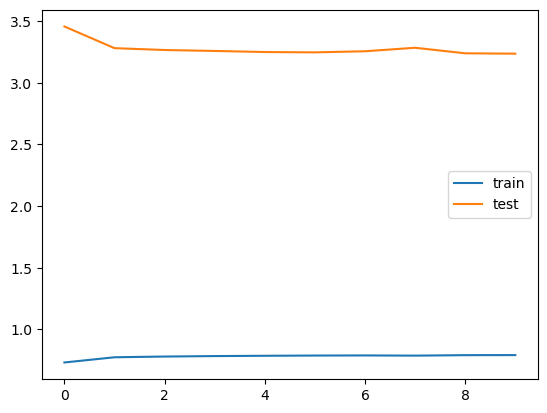

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(('train','test'))

In [20]:
import pandas as pd
df = pd.read_csv('test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

In [21]:
results = model.predict(df)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step


In [22]:
results = np.argmax(results, axis =1)
results = pd.Series(results, name= "label")
final = pd.concat([pd.Series(range(1, 28001), name="Img_Id"), results], axis=1)
final.to_csv("final.csv", index= False)

In [23]:
final

,Img_Id,label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
# Now, let's analyze correctly and incorrectly classified images to understand where
# the model fails and improve its accuracy.

In [25]:
import numpy as np

pred_probs = model.predict(x_test)
pred_classes = np.argmax(pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Tolerance value (adjust as needed)
tolerance = 1e-5

correct_index = np.nonzero(np.isclose(pred_classes, y_test_labels, atol=tolerance))[0]
wrong_index = np.nonzero(~np.isclose(pred_classes, y_test_labels, atol=tolerance))[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


In [26]:
pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y_test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

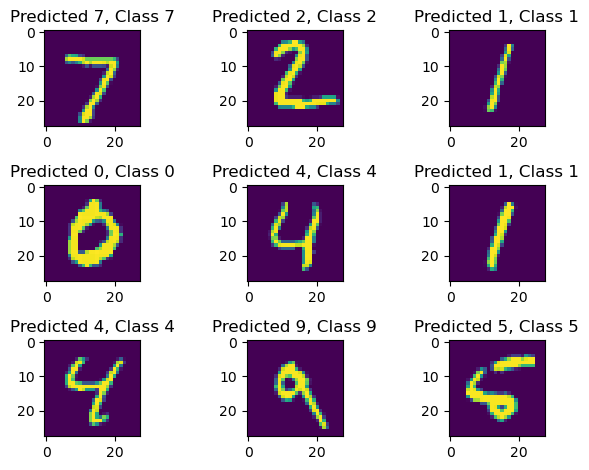

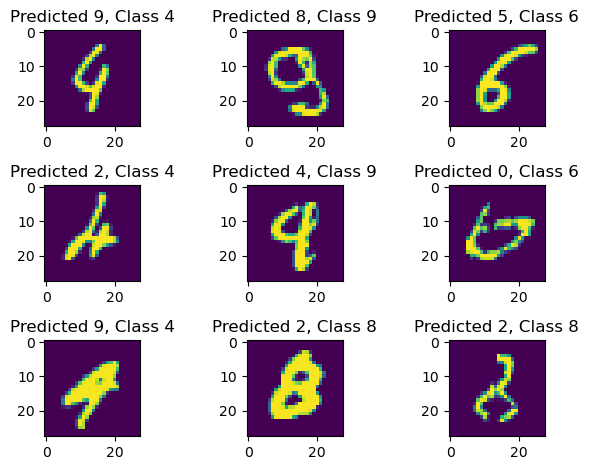

In [29]:
import matplotlib.pyplot as plt

plt.figure()
for i, correct in enumerate(correct_index[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(28, 28), interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_classes[correct], y_test_labels[correct]))
plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(wrong_index[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[incorrect].reshape(28, 28), interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_classes[incorrect], y_test_labels[incorrect]))
plt.tight_layout()

plt.show()
